###### Content originally from https://github.com/engineersCode/EngComp
##### Licensed under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2017 L.A. Barba, N.C. Clementi
##### Adapted for Digital Skills course, TU Delft, 2018

# Vectors, Matrices and Arrays using NumPy

Let's quickly get the definitions out of the way, and start:
* **Vector**: a sequence of numbers; very much like a `list` in regular Python: [1, 2, 6, -2, 0].
* **Matrix**: a 2-dimensional structure of numbers; a vector is therefore a matrix, where one of the dimensions is equal to 1. You could crudely store a matrix in regular Python using a list of lists, where the main list contains entries which themselves are lists. But while this could store your data, it would not be great for calculations, such as matrix multiplication.
* **Array**: an n-dimensional structure of numbers; a general form of a matrix, but with multiple dimensions. 

For example, a 3-dimensional array here shows data collected in a lab: we are performing the experiment several times (N), in each experiment we have several sensors (K), and we set the sensors to collect data on a regular interval so that we end up with J samples per experiment, per sensor.


<img src="images/batch-data-layers-into-page-3d-structure.png" style="width: 400px;"/> 

Storing the data like this is useful, because now you could perform calculations on all experiments over all time, for all sensors in array X.

Engineering applications benefit from using *vectors*, or *matrices* or *arrays*: they are sequences of data all of the _same type_. They behave a lot like lists in Python, except for the constraint that all elements have the same type. 

In general, a Python list can have elements of different types:
```python
    import numpy as np
    my_list = ['abc', 123, 456.7]
```

In that list there are 3 objects, of 3 different types. Try running the code below:

In [1]:
import numpy as np
my_list = ['abc', 123, 456.7] # Adv: try adding np.NaN as a 4th element, and re-run this code
[type(k) for k in my_list]    # remember list comprehensions?

[str, int, float]

There is an efficiency advantage when you know that all elements of a sequence, such as a list, are of the same type. Methods for arrays execute a lot faster than those for lists.

Luckily, groups and organizations have been busy for many years creating **libraries** that create and process these arrays for certain applications.

The most important library in science and engineering is **NumPy**, providing the _n-dimensional array_ data structure (a.k.a, `ndarray`) and a wealth of functions, operations and algorithms for efficient linear-algebra computations.

In this lesson, you'll start using NumPy arrays and discover their power. Later we will also use another widely used library: **Matplotlib**, for creating two-dimensional plots of these data.

## Importing libraries

First, a word on importing libraries to expand your running Python session. Because libraries are large collections of code and are for special purposes, they are not loaded automatically when you launch Python (or IPython, or Jupyter). You have to import a library using the `import` command. For example, to import **NumPy**, you can enter:

```python
import numpy
```

Once you execute that command in a code cell, you can call any NumPy function using the dot notation, prepending the library name. For example, some commonly used functions are:

* [`numpy.linspace()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* [`numpy.ones()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html#numpy.ones)
* [`numpy.zeros()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html#numpy.zeros)
* [`numpy.empty()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html#numpy.empty)
* [`numpy.copy()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.copy.html#numpy.copy)


Part of the community effort to creating the NumPy library, is also an effort at good documentation. Click and read one of those links to explore the documentation - the pages each have the same layout, so once you know where to look, you can quickly search and refer to the documentation for other functions.


#### Stop and think
Why would you need to create a matrix of zeros?

##### Warning:

You will find _a lot_ of sample code online that uses a different syntax for importing. They will do:
```python
import numpy as np
```
All this does is create an alias for `numpy` with the shorter string `np`, so you then would call a **NumPy** function like this: `np.linspace()`. This is just an alternative way of doing it, for lazy people that find it too long to type `numpy` and want to save 3 characters each time. For the not-lazy, typing `numpy` is more readable and beautiful. 

We like it better that you are explicit, but practicality and code reuse  often dictates that people write it with "np" instead.

In [2]:
import numpy
import numpy as np    # both do the same

## Creating an array

To create a NumPy array from an existing list of (homogeneous) numbers, we call **`numpy.array()`**, like this:

In [3]:
np.array([3, 5, 8, 17])

array([ 3,  5,  8, 17])

NumPy offers many [ways to create arrays](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html#routines-array-creation). Explore the above link to see just how many.

Play with `numpy.ones()` and `numpy.zeros()`: they create arrays full of ones and zeros, respectively. We must tell NumPy how many array elements want:

In [4]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [5]:
np.zeros(3)

array([0., 0., 0.])

Another useful one: `numpy.arange()` gives an array of evenly spaced values in a defined interval. 

*Syntax:*

`numpy.arange(start, stop, step)`

* `start` by default is zero
* `stop` is not inclusive, and 
* the `step` has a default value of 1.

Try it out:


In [6]:
np.arange(4)

# we could have also written, but you will agree that this is unnecesary:
np.arange(start=0, stop=4, step=1)

array([0, 1, 2, 3])

In [7]:
np.arange(start=2, stop=6, step=1)
np.arange(start=2, stop=6)  # leave `step` unspecified
np.arange(2, 6)             # leave the arguments unspecified

array([2, 3, 4, 5])

In [8]:
np.arange(start=2, stop=9, step=2)
np.arange(2, 9, 2)

array([2, 4, 6, 8])

In [9]:
np.arange(2, 6, 0.5)

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

`np.linspace()` is similar to `np.arange()`, but uses number of samples instead of a step size. It returns an array with evenly spaced numbers over the specified interval.  

*Syntax:*

`np.linspace(start, stop, num)`

`stop` is included by default (it can be removed, read the docs), and `num` by default is 50. 

In [10]:
np.linspace(2.0, 3.0)

array([2.        , 2.02040816, 2.04081633, 2.06122449, 2.08163265,
       2.10204082, 2.12244898, 2.14285714, 2.16326531, 2.18367347,
       2.20408163, 2.2244898 , 2.24489796, 2.26530612, 2.28571429,
       2.30612245, 2.32653061, 2.34693878, 2.36734694, 2.3877551 ,
       2.40816327, 2.42857143, 2.44897959, 2.46938776, 2.48979592,
       2.51020408, 2.53061224, 2.55102041, 2.57142857, 2.59183673,
       2.6122449 , 2.63265306, 2.65306122, 2.67346939, 2.69387755,
       2.71428571, 2.73469388, 2.75510204, 2.7755102 , 2.79591837,
       2.81632653, 2.83673469, 2.85714286, 2.87755102, 2.89795918,
       2.91836735, 2.93877551, 2.95918367, 2.97959184, 3.        ])

In [11]:
len(np.linspace(2.0, 3.0))   # confirm the default length is indeed 50

50

In [53]:
np.linspace(start=2.0, stop=3.0, num=6)
np.linspace(2.0, 3.0, 6)     # these 2 lines produce identical results; verify it for yourself

array([2. , 2.2, 2.4, 2.6, 2.8, 3. ])

In [13]:
np.linspace(-1, 1, 9)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

## Array operations

Let's assign some arrays to variable names and perform some operations with them.

In [14]:
x_array = np.linspace(-1, 1, 9)

Now that we've saved it with a variable name, we can do some computations with the array. E.g., take the square of every element of the array, in one go:

In [15]:
y_array = x_array**2
print(y_array)

[1.     0.5625 0.25   0.0625 0.     0.0625 0.25   0.5625 1.    ]


We can also take the square root of a positive array, using the `numpy.sqrt()` function:

In [16]:
z_array = np.sqrt(y_array)
print(z_array)

[1.   0.75 0.5  0.25 0.   0.25 0.5  0.75 1.  ]


Now that we have different arrays `x_array`, `y_array` and `z_array`, we can do more computations, like add or multiply them. For example:

In [17]:
add_array = x_array + y_array 
print(add_array)

[ 0.     -0.1875 -0.25   -0.1875  0.      0.3125  0.75    1.3125  2.    ]


Array addition is defined element-wise, like when adding two vectors (or matrices). Array multiplication is also element-wise:

In [18]:
mult_array = x_array * z_array
print(mult_array)

[-1.     -0.5625 -0.25   -0.0625  0.      0.0625  0.25    0.5625  1.    ]


We can also divide arrays, but you have to be careful not to divide by zero. This operation will result in a **`nan`** which stands for *Not a Number*. Python will still perform the division, but will tell us about the problem.  

Let's see how this might look:

In [19]:
x_array / y_array

/Users/kevindunn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([-1.        , -1.33333333, -2.        , -4.        ,         nan,
        4.        ,  2.        ,  1.33333333,  1.        ])

## Multidimensional arrays

### 2D arrays 

NumPy can create arrays of N dimensions.  For example, a 2D array is like a matrix, and is created from a nested list as follows:

In [20]:
array_2d = np.array([[1, 2], [3, 4]])
print(array_2d)

[[1 2]
 [3 4]]


2D arrays can be added, subtracted, and multiplied:

In [21]:
X = np.array([[1, 2], [3, 4]])
Y = np.array([[1, -1], [0, 1]])

The addition of these two matrices works exactly as you would expect:

In [22]:
X + Y

array([[2, 1],
       [3, 5]])

What if we try to multiply arrays using the `'*'`operator?

In [23]:
X * Y

array([[ 1, -2],
       [ 0,  4]])

The multiplication using the `'*'` operator is element-wise. If we want to do matrix multiplication we use the `'@'` operator:

In [54]:
X @ Y

array([[1, 1],
       [3, 1]])

Or equivalently we can use `numpy.dot()`:

In [55]:
np.dot(X, Y)

array([[1, 1],
       [3, 1]])

### 3D arrays

Let's create a 3D array by reshaping a 1D array. We can use [`numpy.reshape()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html), where we pass the array we want to reshape and the shape we want to give it, i.e., the number of elements in each dimension. 

*Syntax*
 
`numpy.reshape(array, newshape)`

For example:

In [26]:
a = np.arange(24)

In [27]:
a_3D = np.reshape(a, (2, 3, 4))
print(a_3D)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


We can check for the shape of a NumPy array using the function `numpy.shape()`:

In [28]:
np.shape(a_3D)

(2, 3, 4)

Visualizing the dimensions of the `a_3D` array can be tricky, so here is a diagram that will help you to understand how the dimensions are assigned: each dimension is shown as  a coordinate axis. For a 3D array, on the "x axis", we have the sub-arrays that themselves are two-dimensional (matrices). We have two of these 2D sub-arrays, in this case; each one has 3 rows and 4 columns. Study this sketch carefully, while comparing with how the array `a_3D` is printed out above. 

<img src="images/3d_array_sketch.png" style="width: 400px;"/> 


When we have multidimensional arrays, we can access slices of their elements by slicing on each dimension. This is one of the advantages of using arrays: we cannot do this with lists. 

Let's access some elements of our 2D array called `X`.

In [29]:
X

array([[1, 2],
       [3, 4]])

In [30]:
# Grab the element in the 1st row and 1st column 
X[0, 0]

1

In [31]:
# Grab the element in the 1st row and 2nd column 
X[0, 1]

2

##### Exercises:

From the X array:

1. Grab the 2nd element in the 1st column.
2. Grab the 2nd element in the 2nd column.

Play with slicing on this array:

In [32]:
# Grab the 1st column
X[:, 0]

array([1, 3])

When we don't specify the start and/or end point in the slicing, the symbol `':'` means "all". In the example above, we are telling NumPy that we want all the elements from the 0-th index in the second dimension (the first column).

In [33]:
# Grab the 1st row
X[0, :]

array([1, 2])

##### Exercises:

From the X array:

1. Grab the 2nd column.
2. Grab the 2nd row.

Let's practice with a 3D array. 

In [34]:
a_3D

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

If we want to grab the first column of both matrices in our `a_3D` array, we do:

In [35]:
a_3D[:, :, 0]

array([[ 0,  4,  8],
       [12, 16, 20]])

The line above is telling NumPy that we want:

* first `':'` : from the first dimension, grab all the elements (2 matrices).
* second `':'`: from the second dimension, grab all the elements (all the rows).
* `'0'`       : from the third dimension, grab the first element (first column).

If we want the first 2 elements of the first column of both matrices: 

In [36]:
a_3D[:, 0:2, 0]

array([[ 0,  4],
       [12, 16]])

Below, from the first matrix in our `a_3D` array, we will grab the two middle elements (5,6):

In [37]:
a_3D[0, 1, 1:3]

array([5, 6])

##### Exercises:

From the array named `a_3D`: 

1. Grab the two middle elements (17, 18) from the second matrix.
2. Grab the last row from both matrices.
3. Grab the elements of the 1st matrix that exclude the first row and the first column. 
4. Grab the elements of the 2nd matrix that exclude the last row and the last column. 

## NumPy == Fast and Clean! 

When we are working with numbers, arrays are a better option because the NumPy library has built-in functions that are optimized, and therefore faster than vanilla Python. Especially if we have big arrays. Besides, using NumPy arrays and exploiting their properties makes our code more readable.

For example, if we wanted to add element-wise the elements of 2 lists, we need to do it with a `for` statement. If we want to add two NumPy arrays, we just use the addtion `'+'` symbol!

Below, we will add two lists and two arrays (with random elements) and we'll compare the time it takes to compute each addition.

### Element-wise sum of a Python list

Using the Python library [`random`](https://docs.python.org/3/library/random.html), we will generate two lists with 100 pseudo-random elements in the range [0,100), with no numbers repeated.

In [38]:
#import random library
import random

In [39]:
lst_1 = random.sample(range(100), 100)
lst_2 = random.sample(range(100), 100)

In [40]:
#print first 10 elements
print(lst_1[0:10])
print(lst_2[0:10])

[1, 56, 85, 82, 97, 59, 8, 28, 61, 54]
[31, 22, 59, 34, 71, 39, 35, 99, 49, 44]


We need to write a `for` statement, appending the result of the element-wise sum into a new list we call `result_lst`. 

For timing, we can use the IPython "magic" `%%time`. Writing at the beginning of the code cell the command `%%time` will give us the time it takes to execute all the code in that cell. 

In [41]:
%%time
res_lst = []
for i in range(100):
    res_lst.append(lst_1[i] + lst_2[i])

CPU times: user 57 µs, sys: 0 ns, total: 57 µs
Wall time: 62.9 µs


In [42]:
print(res_lst[0:10])

[32, 78, 144, 116, 168, 98, 43, 127, 110, 98]


### Element-wise sum of NumPy arrays

In this case, we generate arrays with random integers using the NumPy function [`numpy.random.randint()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randint.html). The arrays we generate with this function are not going to be like the lists: in this case we'll have 100 elements in the range [0, 100) but they can repeat. Our goal is to compare the time it takes to compute addition of a _list_ or an _array_ of numbers, so all that matters is that the arrays and the lists are of the same length and type (integers).

In [43]:
arr_1 = numpy.random.randint(0, 100, size=100)
arr_2 = numpy.random.randint(0, 100, size=100)

In [44]:
#print first 10 elements
print(arr_1[0:10])
print(arr_2[0:10])

[35 57 92 62 59 95 92 14 23 31]
[ 3 25 51  2 51 69 86 17 72 92]


Now we can use the `%%time` cell magic, again, to see how long it takes NumPy to compute the element-wise sum.

In [45]:
%%time
arr_res = arr_1 + arr_2

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 24.8 µs


Notice that in the case of arrays, the code not only is more readable (just one line of code), but it is also faster than with lists. This time advantage will be larger with bigger arrays/lists. 

(Your timing results may vary to the ones we show in this notebook, because you will be computing in a different machine.)

##### Exercise

1. Try the comparison between lists and arrays, using bigger arrays; for example, of size 10,000. 
2. Repeat the analysis, but now computing the operation that raises each element of an array/list to the power two. Use arrays of 10,000 elements. 

## Time to Plot

You will love the Python library **Matplotlib**! You'll learn here about its module `pyplot`, which makes line plots. 

We need some data to plot. Let's define a NumPy array, compute derived data using its square, cube and square root (element-wise), and plot these values with the original array in the x-axis. 

In [46]:
xarray = numpy.linspace(0, 2, 41)
print(xarray)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]


In [47]:
pow2 = xarray**2
pow3 = xarray**3
pow_half = numpy.sqrt(xarray)

To plot the resulting arrays as a function of the orginal one (`xarray`) in the x-axis, we need to import the module `pyplot` from **Matplotlib**.

In [48]:
from matplotlib import pyplot
%matplotlib inline

The command `%matplotlib inline` is there to get our plots inside the notebook (instead of a pop-up window, which is the default behavior of `pyplot`). 

We'll use the `pyplot.plot()` function, specifying the line color (`'k'` for black) and line style (`'-'`, `'--'` and `':'` for continuous, dashed and dotted line), and giving each line a label. Note that the values for `color`, `linestyle` and `label` are given in quotes.

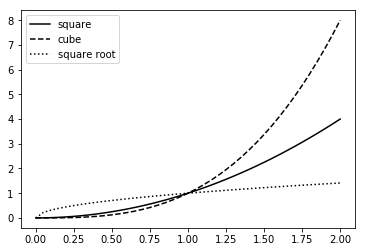

In [49]:
#Plot x^2
pyplot.plot(xarray, pow2, color='k', linestyle='-', label='square')
#Plot x^3
pyplot.plot(xarray, pow3, color='k', linestyle='--', label='cube')
#Plot sqrt(x)
pyplot.plot(xarray, pow_half, color='k', linestyle=':', label='square root')
#Plot the legends in the best location
pyplot.legend(loc='best')

To illustrate other features, we will plot the same data, but varying the colors instead of the line style. We'll also use LaTeX syntax to write formulas in the labels. If you want to know more about LaTeX syntax, there is a [quick guide to LaTeX](https://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf) available online.

Adding a semicolon (`';'`) to the last line in the plotting code block prevents that ugly output, like `<matplotlib.legend.Legend at 0x7f8c83cc7898>`. Try it.

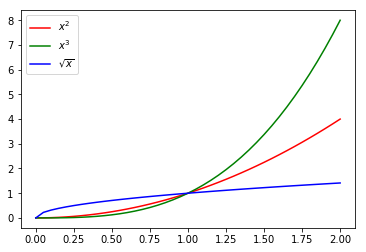

In [50]:
#Plot x^2
pyplot.plot(xarray, pow2, color='red', linestyle='-', label='$x^2$')
#Plot x^3
pyplot.plot(xarray, pow3, color='green', linestyle='-', label='$x^3$')
#Plot sqrt(x)
pyplot.plot(xarray, pow_half, color='blue', linestyle='-', label='$\sqrt{x}$')
#Plot the legends in the best location
pyplot.legend(loc='best'); 

That's very nice! By now, you are probably imagining all the great stuff you can do with Jupyter notebooks, Python and its scientific libraries **NumPy** and **Matplotlib**. We just saw an introduction to plotting but we will keep learning about the power of **Matplotlib** in the next lesson. 

If you are curious, you can explore all the beautiful plots you can make by browsing the [Matplotlib gallery](http://matplotlib.org/gallery.html).

##### Exercise:

Pick two different operations to apply to the `xarray` and plot them the resulting data in the same plot. 

## What we've learned

* How to import libraries
* Multidimensional arrays using NumPy
* Accessing values and slicing in NumPy arrays
* `%%time` magic to time cell execution.
* Performance comparison: lists vs NumPy arrays
* Basic plotting with `pyplot`.

## References

1. _Effective Computation in Physics: Field Guide to Research with Python_ (2015). Anthony Scopatz & Kathryn D. Huff. O'Reilly Media, Inc.

2. _Numerical Python: A Practical Techniques Approach for Industry_. (2015). Robert Johansson. Appress. 

2. ["The world of Jupyter"—a tutorial](https://github.com/barbagroup/jupyter-tutorial). Lorena A. Barba - 2016

In [51]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

FileNotFoundError: [Errno 2] No such file or directory: '../style/custom.css'